In [1]:
from Dataset_v1 import Dataset_v1
from Model_v1 import Model_v1
from Analysis import FeatureAnalysis 
from ModelEval import ModelEval
import pandas as pd
import numpy as np

In [13]:
train_data = pd.read_csv("data/train_data_new.csv")
test_data = pd.read_csv("data/test_data_new.csv")
data_base = pd.concat([train_data,test_data])

In [2]:
dataset = Dataset_v1("data/train_data_new.csv","data/test_data_new.csv",False)
dataset.build_features_into_dataset()
analysis = FeatureAnalysis(dataset)
data=dataset.get_data()

Non numeric features:
 ['BroadcastName', 'TeamName', 'Country', 'Location']


In [32]:
#data.loc[(data["Race_Time_Encoding"]==1)&(data["target"]==1),["Location","Round_Number","Year","BroadcastName","Qual_Q3_Time_Normal","Qual_Position","Race_Time_Encoding","Race_Position"]]

In [9]:
def check_standardized_time_ordering(df):
    def is_time_ascending(group):
        # Sort by Race_Position
        group_sorted = group.sort_values("Qual_Position", ascending=True)
        group_sorted.replace(-1,1000,inplace=True)
        # Check if Standardized_Time is non-decreasing
        valid_times = group_sorted["Qual_Q3_Time"].dropna()
        return valid_times.is_monotonic_increasing

    # Apply the check to each (Year, Round_Number) group
    result = (
        df.groupby(["Year", "Round_Number"])
        .apply(is_time_ascending)
        .reset_index(name="is_time_ordered")
    )

    return result

In [11]:
res = check_standardized_time_ordering(data_base)
res.loc[res["is_time_ordered"]==False]

,Year,Round_Number,is_time_ordered
58,2024,15,False
74,2025,7,False


In [16]:
row_condition = (data_base["Year"]==2025)&(data_base["Round_Number"]==7) 
data_base.loc[row_condition,["Location","TeamName","BroadcastName","Qual_Q3_Time","Qual_Position","Standardized_Time","Race_Position"]].head(20).sort_values(by="Race_Position")

,Location,TeamName,BroadcastName,Qual_Q3_Time,Qual_Position,Standardized_Time,Race_Position
120,Imola,Red Bull Racing,M VERSTAPPEN,74.704,2.0,0.000,1.0
131,Imola,McLaren,L NORRIS,-1.000,4.0,6.109,2.0
138,Imola,McLaren,O PIASTRI,74.670,1.0,12.956,3.0
133,Imola,Ferrari,L HAMILTON,-1.000,12.0,14.356,4.0
127,Imola,Williams,A ALBON,75.473,7.0,17.945,5.0
124,Imola,Ferrari,C LECLERC,-1.000,11.0,20.774,6.0
137,Imola,Mercedes,G RUSSELL,74.807,3.0,22.034,7.0
135,Imola,Williams,C SAINZ,75.432,6.0,22.898,8.0
136,Imola,Racing Bulls,I HADJAR,75.746,9.0,23.586,9.0
126,Imola,Red Bull Racing,Y TSUNODA,-1.000,20.0,26.446,10.0


In [27]:

def yuh(year,round):
    row_condition = (data["Year"]==year)&(data["Round_Number"]==round)
    info = data.loc[row_condition,["Location","Year","Round_Number","BroadcastName","n_past","Qual_Position","driver_encoding","Race_Position"]].sort_values(by="Qual_Position")
    print(len(info))
    return info 

In [28]:
#data[(data['BroadcastName'] == 'S PEREZ') & (data['Year'] == 2024)][['Race_Date_Code', 'Race_Position', 'n_past', 'driver_encoding']]


In [36]:
yuh(2022,15) 

20


,Location,Year,Round_Number,BroadcastName,n_past,Qual_Position,driver_encoding,Race_Position
243,Zandvoort,2022,15,M VERSTAPPEN,14,1.0,6.873841,1.0
254,Zandvoort,2022,15,C LECLERC,14,2.0,9.350008,3.0
238,Zandvoort,2022,15,C SAINZ,14,3.0,8.505778,8.0
252,Zandvoort,2022,15,L HAMILTON,14,4.0,9.502775,4.0
257,Zandvoort,2022,15,S PEREZ,14,5.0,8.529517,5.0
239,Zandvoort,2022,15,G RUSSELL,14,6.0,8.066105,2.0
255,Zandvoort,2022,15,L NORRIS,14,7.0,9.874931,7.0
251,Zandvoort,2022,15,M SCHUMACHER,14,8.0,11.973969,13.0
241,Zandvoort,2022,15,Y TSUNODA,14,9.0,12.723111,20.0
242,Zandvoort,2022,15,L STROLL,14,10.0,10.820291,10.0


In [2]:
dataset = Dataset_v1("data/train_data_new.csv","data/test_data_new.csv",False)
dataset.build_features_into_dataset()

features_for_training = [
    #"n_past_podiums_last_5",
    "Qual_Position",
    #"ewa_driver_results",
    "driver_encoding",
    #"Race_Time_Encoding",
    #"Qual_Q3_Time_Normal",
    #"pos_gained_encoding_simple",
    #"n_past_podiums",
    #"pos_gained_encoding",
    #"TopTeam_Red Bull Racing",
    #"TopTeam_Ferrari",
    #"TopTeam_McLaren",
    #"Sprint_Race_Position",
    #"Sprint_Qual_Position",
    #"TopTeam_Mercedes"
]

dataset.set_features_for_training(features_for_training)

model = Model_v1(dataset,"RF_trn",False)
model.train()
print(model.get_feature_importance())


Features for training set:
 ['Qual_Position', 'driver_encoding']

Dataset Shapes
(1201, 2) (1201,)
(236, 2) (236,)
(133, 2) (133,)


Finding best threshold...
Precision: 0.5625
Recall: 0.75
F1 score: 0.6506024096385542
Best PR threshold: 0.8232706320248285


FPR: 0.23
TPR: 0.9444444444444444
Best ROC threshold: 0.48572163202253155


Best threshold: 0.8232706320248285
Threshold set to: 0.8232706320248285
           feature  importance
0    Qual_Position    0.557344
1  driver_encoding    0.442656


In [3]:
model_eval = ModelEval(model,dataset)
model_eval_df = model_eval.get_df()

In [5]:
model_eval.get_preds_for_race(2025,7)

,Round_Number,Year,Location,Driver,Actual,Predicted,Probability
1433,7,2025,Imola,M VERSTAPPEN,1,1,0.968175
1429,7,2025,Imola,O PIASTRI,1,1,0.955305
1418,7,2025,Imola,G RUSSELL,0,1,0.920379
1434,7,2025,Imola,L NORRIS,1,1,0.889919
1419,7,2025,Imola,C LECLERC,0,0,0.366310
1422,7,2025,Imola,F ALONSO,0,0,0.286887
1435,7,2025,Imola,L HAMILTON,0,0,0.205040
1425,7,2025,Imola,K ANTONELLI,0,0,0.192858
1428,7,2025,Imola,C SAINZ,0,0,0.163569
1427,7,2025,Imola,A ALBON,0,0,0.144160


In [5]:
model_eval.get_driver_with_most_wrong_predictions()

Driver with the most wrong predictions: K ANTONELLI 0.6


,Round_Number,Year,Location,Driver,Actual,Predicted,Probability,correct
1345,3,2025,Suzuka,K ANTONELLI,1,1,0.870554,True
1367,4,2025,Sakhir,K ANTONELLI,0,1,0.848995,False
1385,5,2025,Jeddah,K ANTONELLI,1,1,0.890535,True
1407,6,2025,Miami,K ANTONELLI,1,1,0.853215,True
1425,7,2025,Imola,K ANTONELLI,0,1,0.406940,False


In [6]:
model_eval.get_drivers_with_most_predictions()

,Driver,count
6,G RUSSELL,73
17,M VERSTAPPEN,73
1,C LECLERC,72
2,C SAINZ,72
11,L HAMILTON,71
13,L NORRIS,67
23,S PEREZ,60
5,F ALONSO,56
21,O PIASTRI,42
22,P GASLY,28


In [7]:
model_eval.get_f1score_per_race()

,Round_Number,f1,Location
23,24,0.952381,Yas Island
21,22,0.918033,Yas Island
6,7,0.891566,Monaco
4,5,0.888889,Miami
14,15,0.885246,Zandvoort
13,14,0.885246,Spa-Francorchamps
3,4,0.875000,Imola
9,10,0.870968,Silverstone
5,6,0.867470,Barcelona
19,20,0.866667,Mexico City


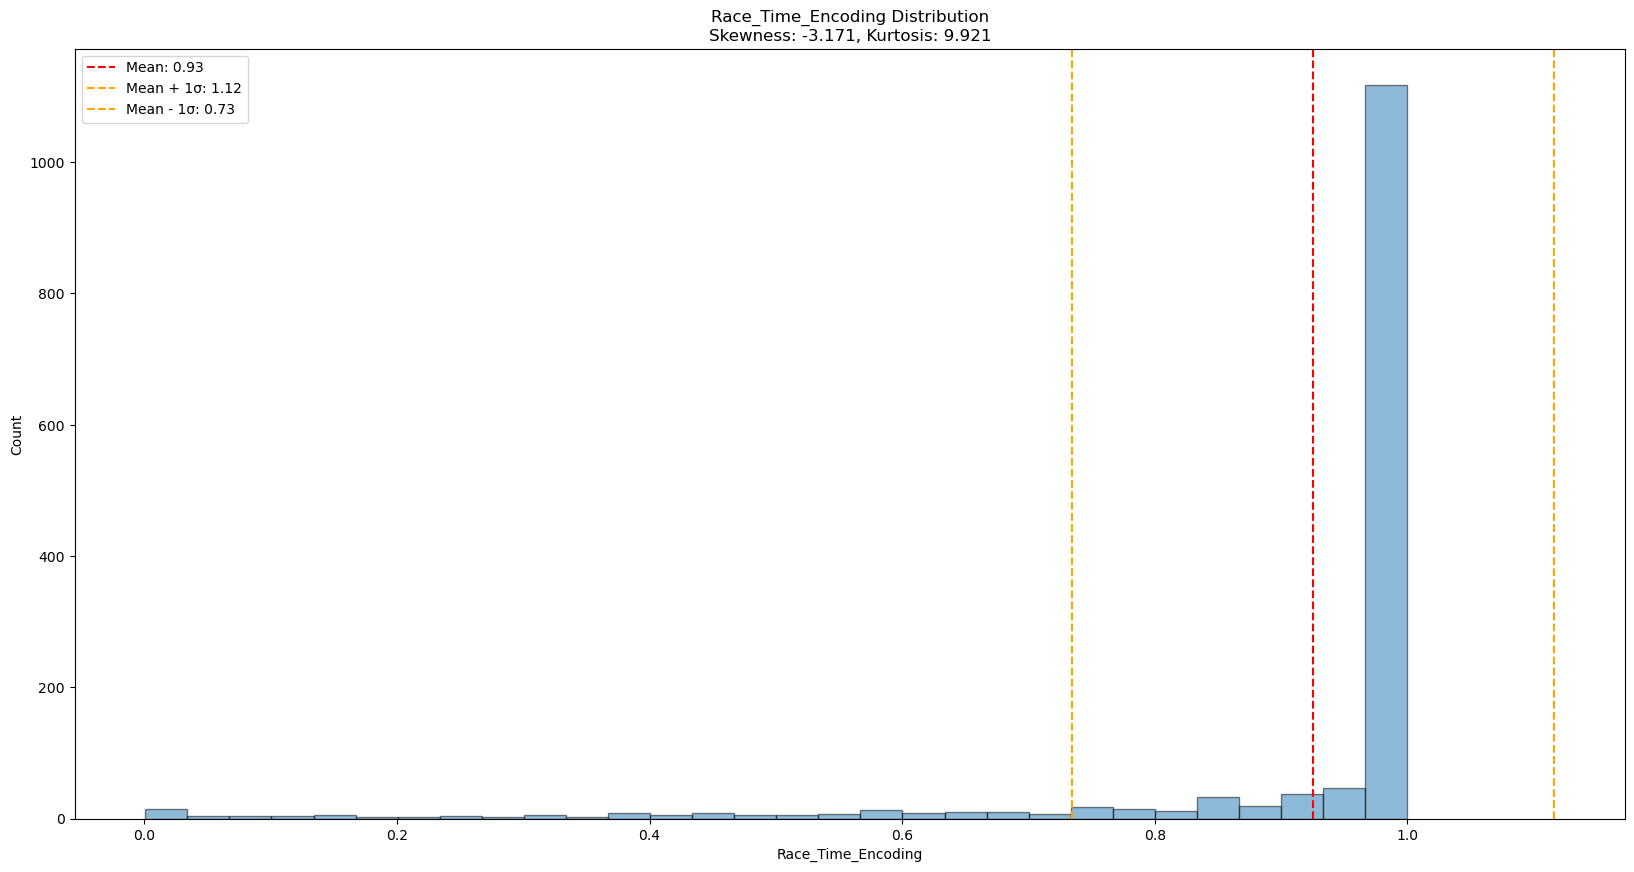

In [25]:
analysis.plot_prob_dist("Race_Time_Encoding")

In [ ]:
analysis.plot_prob_dist("driver_encoding")

In [ ]:
#analysis.plot_prob_dist("lag_SpeedST")

In [ ]:
#analysis.plot_prob_dist("ewa_driver_results")

In [ ]:
def create_pos_gained_encoding(driver, qual_position, race_position):
    """
    # Convert inputs to lists if they're pandas Series
    if isinstance(driver, pd.Series):
        driver = driver.tolist()
    if isinstance(qual_position, pd.Series):
        qual_position = qual_position.tolist()
    if isinstance(race_position, pd.Series):
        race_position = race_position.tolist()
    """
    
    # Handle -1 in race_position
    race_position = [21 if x == -1 else x for x in race_position]
    
    # Calculate position gained
    pos_gained = [q - r for q, r in zip(qual_position, race_position)]

    def calc(x): return (1/np.log(x+1))*((21-x)/20)
    
    # Calculate finishing weights
    finishing_weight = [calc(x) for x in race_position]
    
    final = [] 
    podium_bonus = 1

    for i in range(len(pos_gained)):
        if pos_gained[i] == 0:
            adjusted_pos_gained = finishing_weight[i]
        elif pos_gained[i] > 0:
            adjusted_pos_gained = pos_gained[i]*finishing_weight[i]
        else:
            if finishing_weight[i] <= 0.0: 
                adjusted_pos_gained = pos_gained[i]*(-np.log(finishing_weight[i]+0.000001))*0.05
            else:
                adjusted_pos_gained = pos_gained[i]*(-np.log(finishing_weight[i]))*0.05
            
        if race_position[i] <= 3:
            final.append(adjusted_pos_gained + podium_bonus)
        else:
            final.append(adjusted_pos_gained)

    df = pd.DataFrame({
        "driver": driver,
        "qual_position": qual_position,
        "race_pos": race_position,
        "pos_gained": pos_gained,
        "finishing_weight": finishing_weight,
        "final": final
    }).sort_values(by="final", ascending=False)
    
    return df

In [ ]:
race_results = data.loc[:, ['BroadcastName','Qual_Position','Race_Position']].iloc[20:40]
create_pos_gained_encoding(race_results["BroadcastName"],race_results["Qual_Position"],race_results["Race_Position"])

In [ ]:
race_results = data.loc[:, ['BroadcastName','Qual_Position','Race_Position']].iloc[0:20]
create_pos_gained_encoding(race_results["BroadcastName"],race_results["Qual_Position"],race_results["Race_Position"])